In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file = pd.DataFrame(sns.load_dataset('iris'))

In [2]:
file

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
# Looking at the column names
file.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
# Checking for null values and datatypes
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
# Basic statistics of the variables
file.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are no values that stand out as obviously wrong.

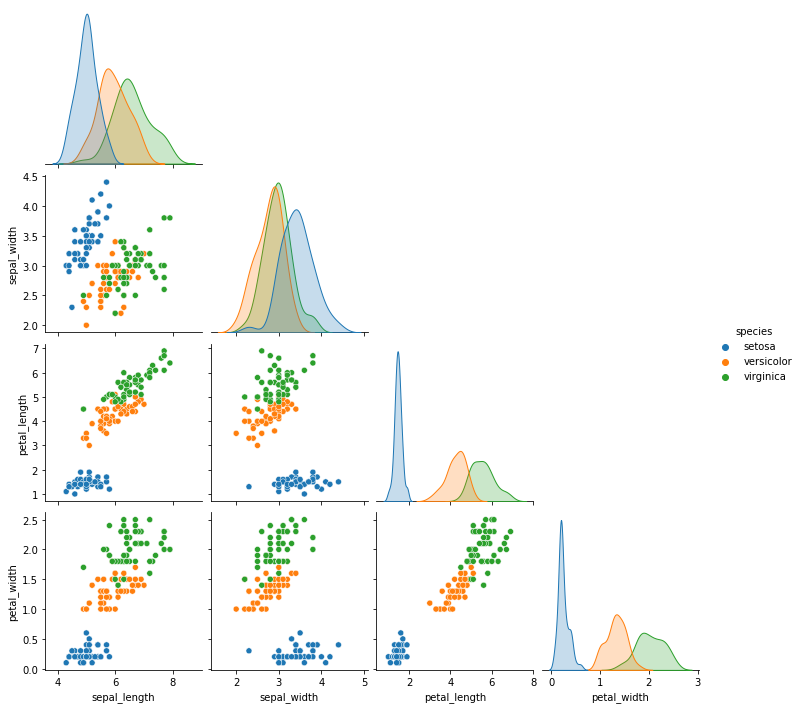

In [6]:
# Creating a pairplot to look at the relations between the variables
sns.pairplot(file, hue = 'species', corner = True)

# Using SVM

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score

In [8]:
x=file.drop('species',axis=1)
y=file['species']
acclist = []

for testsize in [0.3, 0.35, 0.4]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = 43)

    clf = SVC() #Default hyperparameters

    # Fitting the classifier to train
    clf.fit(x_train,y_train)

    # Predicting for test
    y_pred=clf.predict(x_test)

    # Accuracy score
    acclist.append(round(accuracy_score(y_test, y_pred),3))
    
accdf = pd.DataFrame()
accdf['Testsize'] = [str(i*100)+'%' for i in [0.3,0.35,0.4]]
accdf['Accuracy'] = acclist
print('Table showing accuracy with different test sizes, when SVM id used with default hyperparameters:')
accdf

Table showing accuracy with different test sizes, when SVM id used with default hyperparameters:


,Testsize,Accuracy
0,30.0%,0.933
1,35.0%,0.981
2,40.0%,0.933


### Tuning hyperparameters

In [9]:
acclist2 = []
svmhp = [{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'gamma' : ['scale', 'auto']}]
for testsize in [0.3, 0.35, 0.4]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = 47)
    print('For testsize', str(testsize*100)+'%',':\n') 
    
    for i in svmhp:
        grid = GridSearchCV(estimator = SVC(), param_grid = i, scoring = 'accuracy', cv = 10)
        grid.fit(x_train, y_train)
        best_accuracy = grid.best_score_
        best_param = grid.best_params_
        print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
        acclist2.append(best_accuracy*100)
        print('Best Parameters : ',best_param,'\n____________________\n\n')
        
accdf2 = pd.DataFrame()
accdf2['Testsize'] = [str(i*100)+'%' for i in [0.3,0.35,0.4]]
accdf2['Accuracy'] = acclist2
print('Table showing accuracy of train with different test sizes, when SVM id used with tuned hyperparameters:')
accdf2

For testsize 30.0% :

{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}:
Best Accuracy : 96.27%
Best Parameters :  {'C': 0.25, 'gamma': 'scale', 'kernel': 'linear'} 
____________________


For testsize 35.0% :

{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}:
Best Accuracy : 97.00%
Best Parameters :  {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear'} 
____________________


For testsize 40.0% :

{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto']}:
Best Accuracy : 95.56%
Best Parameters :  {'C': 0.25, 'gamma': 'scale', 'kernel': 'poly'} 
____________________


Table showing accuracy of train with different test sizes, when SVM id used with tuned hyperparameters:


,Testsize,Accuracy
0,30.0%,96.272727
1,35.0%,97.000000
2,40.0%,95.555556


In [10]:
# Choosing the best parameters and checking it for the test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 47)
clf = SVC(C = 0.5, gamma = 'scale', kernel = 'linear') 

# Fitting the classifier to train
clf.fit(x_train,y_train)

# Predicting for test
y_pred=clf.predict(x_test)

# Accuracy score
print(accuracy_score(y_test, y_pred))

0.9811320754716981


### Precision, Recall, F1 score

In [11]:
svmhp = [{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'gamma' : ['scale', 'auto']}]
print('--------------------------------------------------------')
for testsize in [0.3, 0.35, 0.4]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = 47)
    print('For testsize', str(testsize*100)+'%',':\n') 
    
    for i in svmhp:
        grid = GridSearchCV(estimator = SVC(), param_grid = i, scoring = 'accuracy', cv = 10)
        grid.fit(x_train, y_train)
        best_accuracy = grid.best_score_
        best_param = grid.best_params_
        vallst = (list(best_param.values()))
    clf = SVC(C = vallst[0], kernel = vallst[2], gamma = vallst[1] )
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    
    print(classification_report(y_test, y_pred))
    print('--------------------------------------------------------')

--------------------------------------------------------
For testsize 30.0% :

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45

--------------------------------------------------------
For testsize 35.0% :

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        21
  versicolor       0.91      1.00      0.95        10
   virginica       1.00      0.95      0.98        22

    accuracy                           0.98        53
   macro avg       0.97      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

--------------------------------------------------------
For testsize 40.0% :

 

## Sensitivity, Specificity

In [12]:
svmhp = [{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf', 'poly', 'sigmoid'], 'gamma' : ['scale', 'auto']}]
print('--------------------------------------------------------')

for testsize in [0.3, 0.35, 0.4]:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize, random_state = 47)
    print('For testsize', str(testsize*100)+'%',':\n') 
    
    for i in svmhp:
        grid = GridSearchCV(estimator = SVC(), param_grid = i, scoring = 'accuracy', cv = 10)
        grid.fit(x_train, y_train)
        best_accuracy = grid.best_score_
        best_param = grid.best_params_
        vallst = (list(best_param.values()))
    clf = SVC(C = vallst[0], kernel = vallst[2], gamma = vallst[1] )
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)

    classnames = ['setosa','versicolor','virginica']
    mx = confusion_matrix(y_test, y_pred, labels = classnames)

    # Calculating sensitivity 
    print('Sensitivity\n______________________________________\n')
    for i in range(len(classnames)):
        tp = mx[i][i]                                             # tp is true positive
        fn = sum(mx[i])                                           # fn is false negative
        print ('For',classnames[i],', sensitivity =',
                    round(tp/fn,2))                      
    print('______________________________________\n\n')

    # Calculating specificity
    print('Specificity\n______________________________________\n')
    for i in range(len(classnames)):
        tn = sum(sum(mx)) - sum(mx)[i] - sum(mx[i]) + mx[i][i]    #tn is true negative
        fp = sum(mx.transpose()[i]) - mx[i][i]                    #fp is false positive
        print ('For',classnames[i],', specificity =',
                    round(tn/(tn+fp),2))        
    print('______________________________________\n\n')
print('--------------------------------------------------------')

--------------------------------------------------------
For testsize 30.0% :

Sensitivity
______________________________________

For setosa , sensitivity = 1.0
For versicolor , sensitivity = 1.0
For virginica , sensitivity = 0.94
______________________________________


Specificity
______________________________________

For setosa , specificity = 1.0
For versicolor , specificity = 0.97
For virginica , specificity = 1.0
______________________________________


For testsize 35.0% :

Sensitivity
______________________________________

For setosa , sensitivity = 1.0
For versicolor , sensitivity = 1.0
For virginica , sensitivity = 0.95
______________________________________


Specificity
______________________________________

For setosa , specificity = 1.0
For versicolor , specificity = 0.98
For virginica , specificity = 1.0
______________________________________


For testsize 40.0% :

Sensitivity
______________________________________

For setosa , sensitivity = 1.0
For versicolor , s

## ROC AUC Curves

#### The ROC curves can only be plotted when it is a binary classification problem. 
#### Here, to plot those curves, we use one hot encoding on the 'Species' column and plot the curves for each class separately.

In [13]:
file2 = pd.get_dummies(file)
file2.head()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0



----------------------------------------------


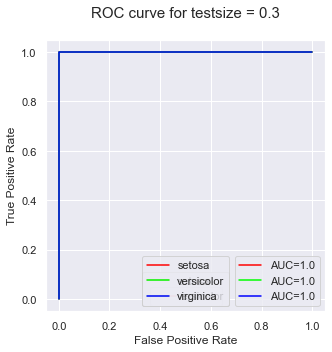


----------------------------------------------


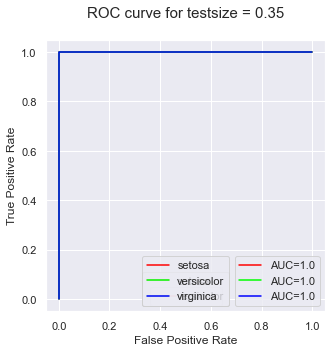


----------------------------------------------


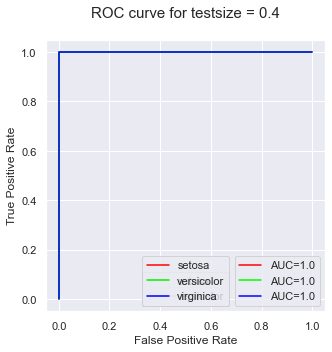


----------------------------------------------


In [16]:
print('\n----------------------------------------------')
for testsize in [0.3, 0.35, 0.4]:
    
    for i in range(len(['species_setosa','species_versicolor','species_virginica'])):    
        X2 = file2[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
        Y2 = file2[['species_setosa','species_versicolor','species_virginica'][i]]
        
        # Train and test splitting
        X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = testsize, random_state = 47)
        #Changing the random_state gives us results that aren't so perfect
    
        # Creating the classifier
        for j in svmhp:
            grid = GridSearchCV(estimator = SVC(), param_grid = j, scoring = 'accuracy', cv = 10)
            grid.fit(X2_train, y2_train)
            best_accuracy = grid.best_score_
            best_param = grid.best_params_
            vallst = (list(best_param.values()))
        clf = SVC(C = vallst[0], kernel = vallst[2], gamma = vallst[1], probability = True)
        clf.fit(X2_train,y2_train)
        y2_pred=clf.predict(X2_test)

        # Training 
        clf.fit(X2_train,y2_train)

        #define metrics
        y2_pred_proba = clf.predict_proba(X2_test)[::,1]
        fpr, tpr, _ = roc_curve(y2_test,  y2_pred_proba) #fpr: false positive rate; tpr: true positive rate
        auc = round(roc_auc_score(y2_test, y2_pred_proba),3)

        #create ROC curve
        from math import *
        c1 = (2**i)-2*i
        c2 = (cos(i*pi) - 1)/-2
        c3 = (2**(abs(i-2)))-2*(abs(i-2))
        rnclr = [c1, c2, c3]
        
        sns.set(rc = {'figure.figsize':(5,5)})
        plt.plot(fpr,tpr,label="AUC="+str(auc),color = rnclr)
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.title('ROC curve for testsize = ' + str(testsize)+'\n', fontsize = '15')
        first_legend = plt.legend(('setosa', 'versicolor', 'virginica'), loc = 8)
        plt.gca().add_artist(first_legend)
        plt.legend(loc = 'lower right')
    plt.show()  
    print('\n----------------------------------------------')